In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

In [7]:
# a lot of example packed in just one single word
# isabella ->
# i is likely to come first
# s is likely to come next, after i
# ... end is likely to come next, after isabella

In [8]:
# get consecutive element
for w in words[:1]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip (chs, chs[1:]):
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>


In [9]:
# generate a dictionary that can map this bigrams
bigrams = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        bigrams[bigram] = bigrams.get(bigram, 0) + 1

print(len(bigrams))

627


In [10]:
sorted(bigrams.items(), key = lambda kv:-kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [11]:
import torch

In [12]:
# To build this model, we will generate a 26 x 26 matrix
# each element will represent the probability that 
# the row value is preceded by the colum value
# because we have two extra character <S> and <E>
# we will actually build 28 x 28 matrix

N = torch.zeros((28, 28), dtype = torch.int32)

In [13]:
# We need a sort of dictionary that can take a character
# and turn it into the index we need for the matrix 

chars = sorted(list(set(''.join(words))))
# a list of characters that appears in the words list
stoi = {s:i for i, s in enumerate(chars)} 
# generates a dictionary with characters as key and index as value
stoi['<S>'] = 26
stoi['<E>'] = 27


In [14]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] 
    for ch1, ch2 in zip(chs, chs[1:]):
        N[stoi[ch1], stoi[ch2]] += 1

N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

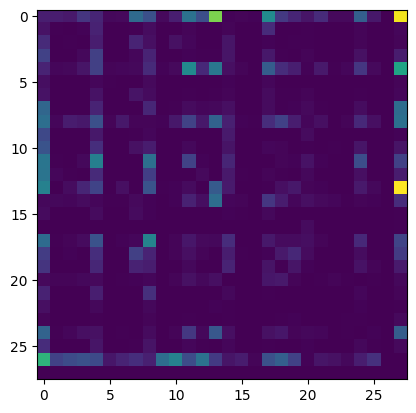

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(N)

In [ ]:
itos = {i:s for s, i in stoi.items()}
itos

In [ ]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')

for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")

plt.axis('off')

In [ ]:
# re shaping everything

N = torch.zeros((27, 27), dtype = torch.int32)

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)} 
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

for w in words:
    chs = ['.'] + list(w) + ['.'] 
    for ch1, ch2 in zip(chs, chs[1:]):
        N[stoi[ch1], stoi[ch2]] += 1


plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")

plt.axis('off')

In [19]:
N[0]
p = N[0].float()
p = p / p.sum()
p
g = torch.Generator().manual_seed(69696929)
itos[torch.multinomial(p, 1, replacement=True, generator=g).item()]

'z'

In [ ]:
Prob_dist = N.float()
Prob_dist /= Prob_dist.sum(1, keepdim=True)

for i in range(27):
    print (Prob_dist[i].sum())


In [ ]:
# here is a name predictor that just prints bunch of new name

g = torch.Generator().manual_seed(1093)
for i in range(10):
    index = 0
    name = []
    while True:
        p = Prob_dist[index]
        predicted_index = torch.multinomial(p, 1, replacement=True, generator=g).item()
        if predicted_index == 0:
            break
        name.append(itos[predicted_index])
        index = predicted_index
    print(''.join(name))

# weird lists... 
# bigram is terrible...

In [42]:
# we need to somehow figure out the probability of the model
# evaluate quality of the model using a number

log_prob = 0
count = 0
for w in words:
    chs = ['.'] + list(w) + ['.'] 
    for ch1, ch2 in zip(chs, chs[1:]):
        prob = Prob_dist[stoi[ch1], stoi[ch2]]
        count += 1
        log_prob += torch.log(prob)

negative_log_likelihood = -log_prob.item()
print(f"{negative_log_likelihood/count=}")

negative_log_likelihood/count=2.454094088872915


In [45]:
# Goal... our model is shit...
# We did train our model, but the likelihood of this values are horrible
# Note on likelihood:
# so our model has 27 x 27 probability value stored in a matrix Prob_dist
# and in our sample we have a value .emma.
# probability of that word should be large, right? because it is in the sample... 
# so our distribution should such that, probability of having .emma. should be large
# that probability value is = Pr[.e]xPr[em]xPr[ma]xPr[a.]
# So probability of the entire sample is multiple of such probability of words in the sample
# ... that means we need to multiply all the probability.. which is painful... and the value that it returns will be extremely small
# a good solution, use log....
# so the thing we want to maximize = sum log(prob(word))
# loss function should be opposite of it... so loss = -sum log(prob(word))
# for better scaling we use -sum log(prob(word)) / sample_size.... 

In [46]:
# current problem... if some prob is 0... log will straight out return inf
# solution: have all value have 1 initially.. to smooth out

Prob_dist = (N+1).float()
Prob_dist /= Prob_dist.sum(1, keepdims=True)

In [47]:
log_prob = 0
count = 0
for w in words:
    chs = ['.'] + list(w) + ['.'] 
    for ch1, ch2 in zip(chs, chs[1:]):
        prob = Prob_dist[stoi[ch1], stoi[ch2]]
        count += 1
        log_prob += torch.log(prob)

negative_log_likelihood = -log_prob.item()
print(f"{negative_log_likelihood/count=}")

negative_log_likelihood/count=2.4543562565199477


In [48]:
# so let's calculate likelihood of one word: shamit

log_prob = 0
count = 0
my_word = 'shamit'
for w in my_word:
    chs = ['.'] + list(w) + ['.'] 
    for ch1, ch2 in zip(chs, chs[1:]):
        prob = Prob_dist[stoi[ch1], stoi[ch2]]
        count += 1
        log_prob += torch.log(prob)

negative_log_likelihood = -log_prob.item()
print(f"{negative_log_likelihood/count=}")

negative_log_likelihood/count=2.479089895884196


In [49]:
# Now let's use neural network ^_^

In [50]:
# create training set

xs, ys = [], []

for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs , chs[1:]):
        xs.append(stoi[ch1])
        ys.append(stoi[ch2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [51]:
xs

tensor([ 0,  5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1])

In [52]:
ys

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0])

In [ ]:
# we need to feed the xs and ys into neural network
# but directly giving it into neural network isn't advisable... 
# instead, use on_hot approach
# generate a vector [0 0 0 ... 0] (27 len)
# for xs = 13, only 1 the 13th position.. UwU
# pytorch already have this though

In [ ]:
# let's go with the implementation
import torch.nn.functional as torchFunc
# forward pass:

# get input x outputs
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs , chs[1:]):
        xs.append(stoi[ch1])
        ys.append(stoi[ch2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)


# generate initial weight matrix for all 27 neuron... 
# each neuron has 27 input... so matrix -> 27 x 27
g = torch.Generator().manual_seed(69696969)
W = torch.randn((27, 27), dtype=torch.float, generator=g, requires_grad=True)

# encoding xs values to be proper input
x_enc = torchFunc.one_hot(xs, num_classes=27).float()
logits = x_enc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
# this two functions are often called softmax
# e^z / sum (e^z)

# need to count loss
loss = -probs[torch.arange(5), ys].log().mean()

# generate backward pass
W.grad = None
loss.backward()
W.grad

In [27]:
words = open('names.txt', 'r').read().splitlines()
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)} 
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
import torch.nn.functional as torchFunc
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# g = torch.Generator().manual_seed(10)
# Weights = torch.randn((27, 27), generator=g, requires_grad=True)
# Bias = torch.randn((1, 27), generator=g, requires_grad=True)
# logits = x_enc @ Weights + Bias
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdim=True)
# print(prob.shape, x_enc.shape)

torch.Size([228146, 27]) torch.Size([228146, 27])


In [39]:
#Let's build out actual algorithm
g = torch.Generator().manual_seed(10)
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs , chs[1:]):
        xs.append(stoi[ch1])
        ys.append(stoi[ch2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)
training_sample = xs.shape[0]

x_enc = torchFunc.one_hot(xs, num_classes=27).float()
Weights = torch.randn((27, 27), generator=g, requires_grad=True)
Bias = torch.randn((1, 27), generator=g, requires_grad=True)
# Weights2 = torch.randn((27, 27), generator=g, requires_grad=True)
# Bias2 = torch.randn((1, 27), generator=g, requires_grad=True)
# Weights3 = torch.randn((27, 27), generator=g, requires_grad=True)
# Bias3 = torch.randn((1, 27), generator=g, requires_grad=True)
learning_rate = -50
learning_rate_decrease = 0.999999999999
current_loss = 100
iteration = 0

while True:
    #level 1
    logits = x_enc @ Weights 
    counts = logits.exp()
    prob = counts / counts.sum(1, keepdim=True)

    # #level 2
    # logits = prob @ Weights2 + Bias2
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdim=True)

    # #level 3
    # logits = prob @ Weights3 + Bias3
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdim=True)

    loss = -prob[torch.arange(training_sample), ys].log().mean() + 0.01*(Weights**2).mean()
    current_loss = loss.item()
    print(current_loss)

    Weights.grad = None
    Bias.grad = None
    # Weights2.grad = None
    # Bias2.grad = None
    # Weights3.grad = None
    # Bias3.grad = None

    loss.backward()

    Weights.data += learning_rate * Weights.grad
    # Bias.data +=  learning_rate * Bias.grad
    # Weights2.data += learning_rate * Weights2.grad
    # Bias2.data +=  learning_rate * Bias2.grad
    # Weights3.data += learning_rate * Weights3.grad
    # Bias3.data +=  learning_rate * Bias3.grad

    iteration += 1
    if(iteration > 1000):
        break


logits = x_enc @ Weights
counts = logits.exp()
prob = counts / counts.sum(1, keepdim=True)
loss = -prob[torch.arange(training_sample), ys].log().mean()
print(f"{iteration=} loss={loss.item():.4f}")


3.861180067062378
3.3933422565460205
3.1596736907958984
3.0209739208221436
2.928812026977539
2.8608152866363525
2.8090059757232666
2.7685110569000244
2.7362160682678223
2.7100257873535156
2.6884427070617676
2.6703739166259766
2.6550216674804688
2.64180588722229
2.6302995681762695
2.6201844215393066
2.6112172603607178
2.6032090187072754
2.596011161804199
2.589503765106201
2.5835890769958496
2.5781874656677246
2.573232650756836
2.5686700344085693
2.5644524097442627
2.5605406761169434
2.5569019317626953
2.5535082817077637
2.5503346920013428
2.547360420227051
2.544567823410034
2.5419414043426514
2.5394668579101562
2.5371322631835938
2.5349268913269043
2.532841444015503
2.530867338180542
2.528996706008911
2.5272223949432373
2.525538921356201
2.523939371109009
2.522418737411499
2.520972490310669
2.5195956230163574
2.518284797668457
2.5170347690582275
2.515842914581299
2.5147058963775635
2.513620376586914
2.5125834941864014
2.511592149734497
2.5106444358825684
2.509737491607666
2.508869171142

In [40]:
# let's generate some word with the weights
for _ in range(100):
    current_index = 0
    generated_word = []
    while True:
        input = torch.zeros((27)).float()
        input[current_index] = 1.0
        logits = input @ Weights
        logits = logits.detach()
        counts = logits.exp()
        prob = counts / counts.sum(0, keepdim=True)
        predicted_index = torch.multinomial(prob, 1, replacement=True, generator=g).item()
        # print(predicted_index)
        if predicted_index == 0:
            break
        generated_word.append(itos[predicted_index])
        current_index = predicted_index

    generated_word = ''.join(generated_word)
    print(generated_word)



n
merith
ke
uiea
jamaliynirynin
shaneviaceys
zadonboraziylian
ayn
joe
ailletan
sea
ss
sh
ricennshaskayineiyahnn
gyl
kelicaauszlenizar
te
dshnda
ja
bra
mobren
rely
elfeocerolyn
tce
zkyarrenchouon
an
cedidaueryar
coleax
lyarosa
lulyuryne
celedon
ka
ta
rkishaviyneirchio
lloluraynda
msc
rwkeyn
zalyak
ahelamerlelyastr
ighish
sealiar
eosh
jaliana
dettor
mul
a
gma
ri
ziyorelya
nevadena
ie
alisazes
tedicelynsara
a
eannnn
schj
ewa
ri
lucleriaziabemya
s
ly
e
zuanzio
zesela
fialiayn
lort
h
lan
m
lyaiselaraie
malett
jneke
cyujy
ad
avo
baseleiaun
ll
aja
daleifendjayn
kiatonain
darighonire
n
amamix
ryn
opah
hamo
ligusuvinari
ke
man
l
heria
k
locerauwesbrishvesieynevgn
coniinore
an
ty
kahlerionalicalavaleahaxqusaali
vow
dh
kon
